In [54]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [55]:
train_labels[0]

1

In [56]:
max([max(sequence) for sequence in train_data])

9999

In [57]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [58]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)  # dimension은 default값(10000)으로 들어감
x_test = vectorize_sequences(test_data)

In [59]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [60]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [61]:
y_train[1]  # negative

0.0

In [62]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [81]:
# 훈련 검증(validation)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [82]:
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 194us/step - loss: 0.0334 - acc: 0.9889 - val_loss: 0.0401 - val_acc: 0.9901
Epoch 2/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0199 - acc: 0.9950 - val_loss: 0.0446 - val_acc: 0.9876
Epoch 3/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.0142 - acc: 0.9970 - val_loss: 0.0534 - val_acc: 0.9855
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.0095 - acc: 0.9980 - val_loss: 0.0589 - val_acc: 0.9834
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.0062 - acc: 0.9987 - val_loss: 0.0783 - val_acc: 0.9785
Epoch 6/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0931 - val_acc: 0.9757
Epoch 7/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.1230 - 

In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

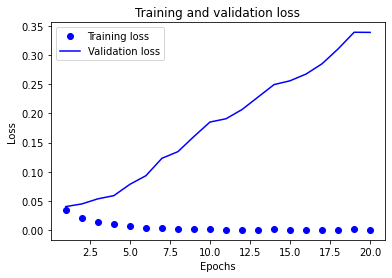

In [84]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

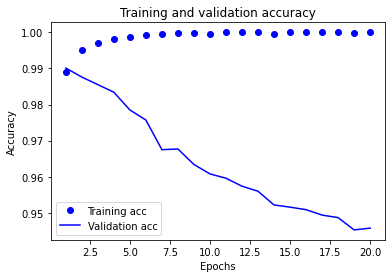

In [85]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [86]:
# 모델 재훈련

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=100)            # epochs = 4에서 10으로, batch_size = 512에서 100으로 변경
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 3s 127us/step - loss: 0.3415 - accuracy: 0.8640
Epoch 2/10
25000/25000 [==============================] - 3s 125us/step - loss: 0.2069 - accuracy: 0.9208
Epoch 3/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.1678 - accuracy: 0.9355
Epoch 4/10
25000/25000 [==============================] - 3s 127us/step - loss: 0.1417 - accuracy: 0.9486
Epoch 5/10
25000/25000 [==============================] - 3s 126us/step - loss: 0.1177 - accuracy: 0.9573
Epoch 6/10
25000/25000 [==============================] - 3s 127us/step - loss: 0.0977 - accuracy: 0.9650
Epoch 7/10
25000/25000 [==============================] - 3s 125us/step - loss: 0.0784 - accuracy: 0.9732
Epoch 8/10
25000/25000 [==============================] - 3s 126us/step - loss: 0.0621 - accuracy: 0.9790
Epoch 9/10
25000/25000 [==============================] - 3s 124us/step - loss: 0.0468 - accuracy: 0.9850
Epoch 10/10
25000/25000 [=====================

In [87]:
results

[0.7714953752541542, 0.8546800017356873]

In [88]:
# 새로운 데이터 예측

model.predict(x_test)

array([[0.24075255],
       [1.        ],
       [0.99999714],
       ...,
       [0.10805956],
       [0.00545931],
       [0.9407409 ]], dtype=float32)

In [89]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
